In [4]:
from google.colab import files
files.upload()

ModuleNotFoundError: No module named 'google'

In [ ]:
import

In [3]:
! pip install -q kaggle

In [ ]:

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/


In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d emmarex/plantdisease


Dataset URL: https://www.kaggle.com/datasets/emmarex/plantdisease
License(s): unknown
100% 658M/658M [00:31<00:00, 25.4MB/s]
100% 658M/658M [00:31<00:00, 21.8MB/s]


In [ ]:
!ls -lrth

total 658M
-rw-r--r-- 1 root root 658M Oct 10  2019 plantdisease.zip
drwxr-xr-x 1 root root 4.0K May  9 13:24 sample_data
-rw-r--r-- 1 root root   67 May 14 15:29 kaggle.json


In [ ]:
!unzip plantdisease.zip

Streaming output truncated to the last 5000 lines.
  inflating: plantvillage/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/08c033bd-fbc3-445a-88d1-1863070e52ce___YLCV_GCREC 2872.JPG  
  inflating: plantvillage/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/08dd176c-e9d9-4746-92c3-fa8dc9074347___UF.GRC_YLCV_Lab 03057.JPG  
  inflating: plantvillage/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/08f78a80-46f5-45a6-937c-4d05d61c08c2___UF.GRC_YLCV_Lab 01895.JPG  
  inflating: plantvillage/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/0903aa95-6e8a-4abd-a003-126fcd9a5493___YLCV_GCREC 2806.JPG  
  inflating: plantvillage/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/0911d416-d73d-4c2a-8e45-207a7ceb7c9a___YLCV_GCREC 2773.JPG  
  inflating: plantvillage/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/09188838-cc89-4925-94c5-d9563c4cb4bf___UF.GRC_YLCV_Lab 02974.JPG  
  inflating: plantvillage/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/0922e026-b563-438d-b9ed-74

In [ ]:
!ls -lrth PlantVillage/

total 2.0M
drwxr-xr-x 2 root root  96K May 14 15:30 Pepper__bell___Bacterial_spot
drwxr-xr-x 2 root root 148K May 14 15:30 Pepper__bell___healthy
drwxr-xr-x 2 root root 100K May 14 15:30 Potato___Early_blight
drwxr-xr-x 2 root root  96K May 14 15:30 Potato___Late_blight
drwxr-xr-x 2 root root  20K May 14 15:30 Potato___healthy
drwxr-xr-x 2 root root 220K May 14 15:30 Tomato_Bacterial_spot
drwxr-xr-x 2 root root  92K May 14 15:30 Tomato_Early_blight
drwxr-xr-x 2 root root 192K May 14 15:30 Tomato_Late_blight
drwxr-xr-x 2 root root 100K May 14 15:30 Tomato_Leaf_Mold
drwxr-xr-x 2 root root 168K May 14 15:30 Tomato_Septoria_leaf_spot
drwxr-xr-x 2 root root 156K May 14 15:30 Tomato_Spider_mites_Two_spotted_spider_mite
drwxr-xr-x 2 root root 136K May 14 15:30 Tomato__Target_Spot
drwxr-xr-x 2 root root 332K May 14 15:30 Tomato__Tomato_YellowLeaf__Curl_Virus
drwxr-xr-x 2 root root  36K May 14 15:30 Tomato__Tomato_mosaic_virus
drwxr-xr-x 2 root root 148K May 14 15:30 Tomato_healthy


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import random
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import classification_report,confusion_matrix
import warnings
warnings.filterwarnings('ignore')


In [ ]:
imgs_path='PlantVillage/'
img_size=84
batch_size=64



In [ ]:
class_names = os.listdir(imgs_path)
class_names

['Tomato__Tomato_mosaic_virus',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Potato___Late_blight',
 'Pepper__bell___Bacterial_spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Pepper__bell___healthy',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Early_blight',
 'Potato___Early_blight',
 'Tomato_Bacterial_spot',
 'Tomato_Leaf_Mold',
 'Tomato__Target_Spot',
 'Tomato_healthy',
 'Tomato_Late_blight',
 'Potato___healthy']

In [ ]:
def get_data(data_dir):
    img_data = []
    labels=[]
    for label in class_names:
        path = os.path.join(data_dir, label)
        class_num = class_names.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                img_data.append(resized_arr)
                labels.append(class_num)
            except Exception as e:
                print(e)
    return np.array(img_data),np.array(labels)

In [ ]:

img_data,labels = get_data(imgs_path)
print(f'the shape of input image data is {img_data.shape}, labels shape is {labels.shape}')

OpenCV(4.8.0) /io/opencv/modules/imgproc/src/resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

the shape of input image data is (20638, 84, 84, 3), labels shape is (20638,)


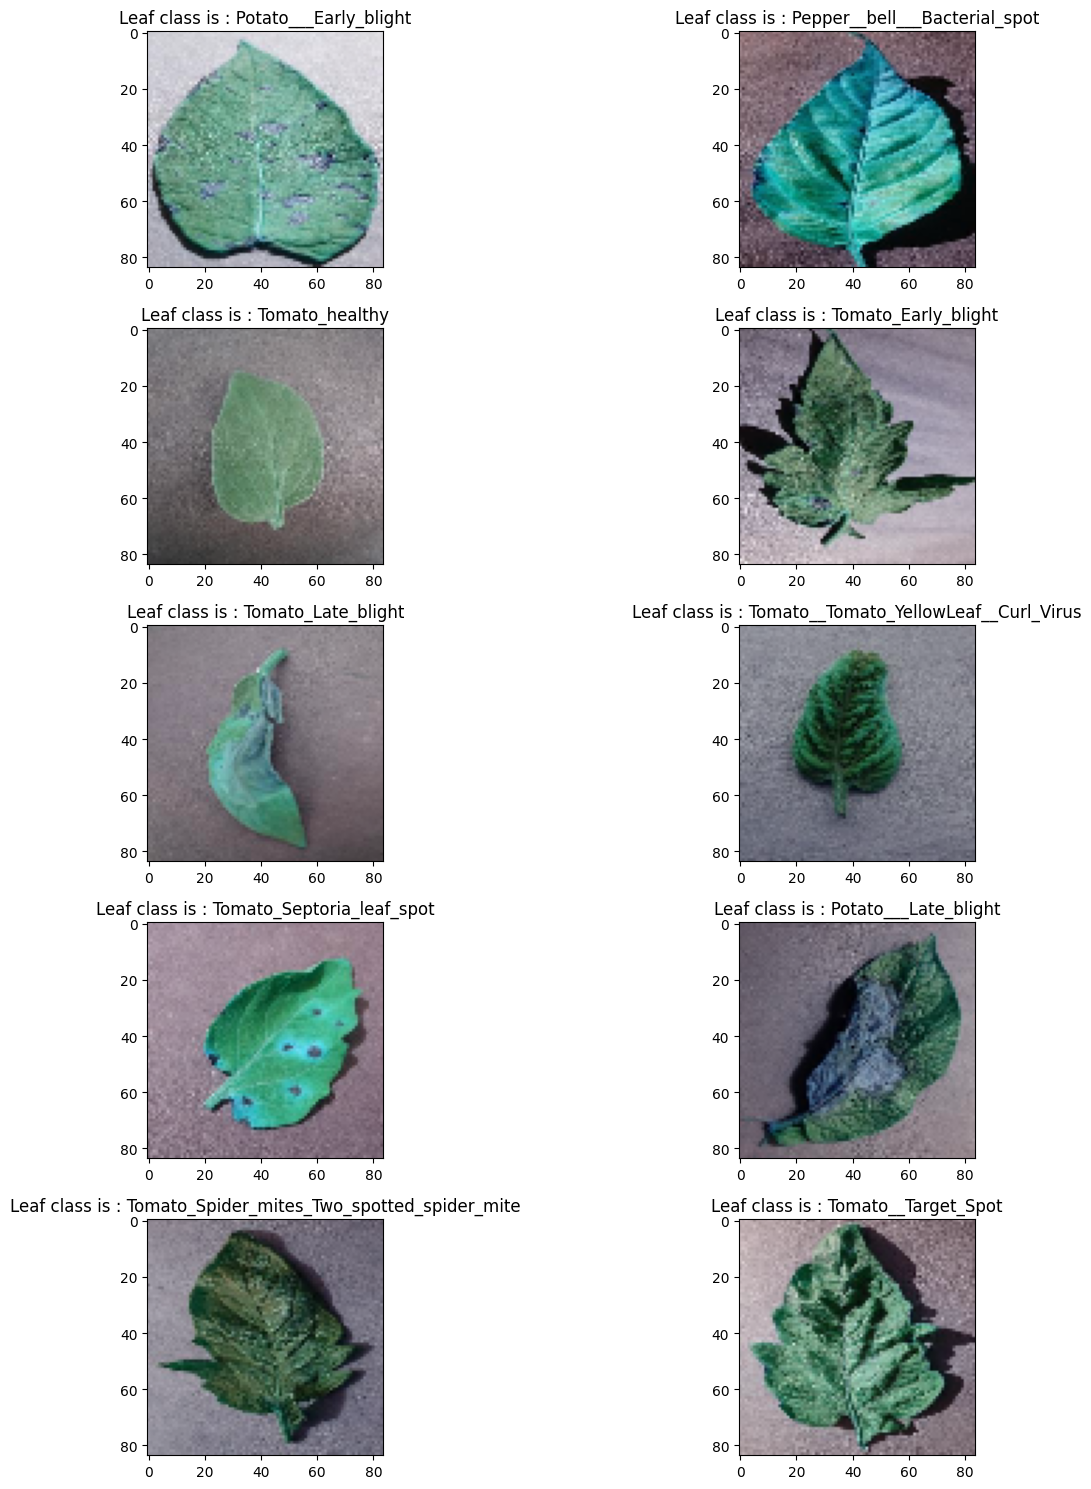

In [ ]:
fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (2):
        l=random.randint(0,len(img_data))
        ax[i,j].imshow(img_data[l])
        ax[i,j].set_title('Leaf class is : '+str(class_names[labels[l]]))

plt.tight_layout()

In [ ]:

from tensorflow.keras.applications.inception_v3 import preprocess_input
img_data=preprocess_input(img_data)
img_data[0]


array([[[ 0.27058828,  0.18431377,  0.30980396],
        [ 0.19215691,  0.10588241,  0.2313726 ],
        [ 0.14509809,  0.05882359,  0.19215691],
        ...,
        [-0.19999999, -0.29411763, -0.15294117],
        [ 0.05098045, -0.04313725,  0.09803927],
        [-0.05098039, -0.14509803, -0.00392157]],

       [[ 0.13725495,  0.05098045,  0.17647064],
        [ 0.22352946,  0.13725495,  0.26274514],
        [ 0.20000005,  0.11372554,  0.23921573],
        ...,
        [-0.03529412, -0.1372549 ,  0.01176476],
        [-0.12156862, -0.21568626, -0.0745098 ],
        [-0.12941176, -0.2235294 , -0.08235294]],

       [[ 0.254902  ,  0.1686275 ,  0.2941177 ],
        [ 0.32549024,  0.23921573,  0.36470592],
        [ 0.082353  , -0.00392157,  0.12156868],
        ...,
        [-0.01176471, -0.10588235,  0.03529418],
        [ 0.04313731, -0.05098039,  0.09019613],
        [ 0.14509809,  0.05098045,  0.19215691]],

       ...,

       [[ 0.20784318,  0.07450986,  0.18431377],
        [ 0

In [ ]:

from tensorflow.keras.utils import to_categorical
labels=to_categorical(labels)
labels[0]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(img_data,labels,test_size=0.2,random_state=0,stratify=labels)
print(f'X_train size is {X_train.shape}, X_test shape is {X_test.shape}')

X_train size is (16510, 84, 84, 3), X_test shape is (4128, 84, 84, 3)


In [ ]:
del img_data,labels

In [ ]:
from tensorflow.keras.layers import *

from tensorflow.keras.models import *

In [ ]:
from tensorflow.keras.applications.vgg19 import VGG19
vgg = VGG19(input_shape=(img_size,img_size,3), include_top=False, weights="imagenet")

for layer in vgg.layers[:19]:
        layer.trainable = False

model2=Sequential()
model2.add(vgg)
model2.add(MaxPool2D((2,2),strides=(2,2)))
model2.add(Flatten())
model2.add(Dense(len(class_names),activation='softmax'))
model2.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model2.summary()

80134624/80134624 [==============================] - 4s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 2, 2, 512)         20024384  
                                                                 
 max_pooling2d (MaxPooling2  (None, 1, 1, 512)         0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 15)                7695      
                                                                 
Total params: 20032079 (76.42 MB)
Trainable params: 4727311 (18.03 MB)
Non-trainable params: 15304768 (58.38 MB)
_________________________________________________________________


In [ ]:
history2=model2.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=2,batch_size=batch_size)

Epoch 1/10
258/258 [==============================] - 2234s 9s/step - loss: 0.8052 - accuracy: 0.7386 - val_loss: 0.4021 - val_accuracy: 0.8617
Epoch 2/10
258/258 [==============================] - 2228s 9s/step - loss: 0.3366 - accuracy: 0.8842 - val_loss: 0.3085 - val_accuracy: 0.8953
Epoch 3/10
136/258 [==============>...............] - ETA: 13:57 - loss: 0.2194 - accuracy: 0.9229

In [ ]:

plt.figure(figsize=[8,6])
plt.plot(history2.history['accuracy'],'r',linewidth=2.0)
plt.plot(history2.history['val_accuracy'],'b',linewidth=2.0)
plt.legend(['Training accuracy', 'Validation accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('accuracy',fontsize=16)
plt.title('val accuracy',fontsize=16)


In [ ]:

vgg_acc=model2.evaluate(X_test,y_test)
print('accuracy of the model is ',vgg_acc[1])


In [ ]:
from google.colab import files
files.upload()

In [ ]:
#image_name='PlantVillage/Potato___healthy/03da9931-e514-4cc7-b04a-8f474a133ce5___RS_HL 1830.JPG'   # enter image to test
image_name='test2.jpg'
# plt.imshow(plt.imread(image_name))
x1=[]
img_1 = cv2.imread(image_name, cv2.IMREAD_COLOR)
# from google.colab.patches import cv2_imshow
# cv2_imshow(img_1)
resized_arr_1 = cv2.resize(img_1, (img_size, img_size)) # Reshaping images to preferred size
plt.imshow(resized_arr_1)
x1.append([resized_arr_1])
x1=np.array(x1)
x1 = preprocess_input(x1)
x1 = x1.reshape(-1, img_size, img_size, 3)
x1.shape

In [ ]:
pred=model2.predict(x1) # for predicting class
print(pred)
# print(pred)
 # predicting probability
labels_pred=np.argmax(pred,axis=1)
# print(labels_pred)
print('output is ',class_names[labels_pred[0]])
# labels=get_labels(labels_pred)
pred_results=pd.DataFrame(data=pred,columns=class_names)
import seaborn as sns
fig=plt.figure(figsize=(10,8))
sns.set_theme(style="darkgrid")
ax=sns.barplot(data=pred_results)
ax.set_xticklabels(class_names,rotation=90)
ax.set_xlabel('Class')
ax.set_ylabel('Accuracy')
ax.set_title('Predicting class name ')
plt.show()
